# Fundamentos de Sistemas Inteligentes en Visión  
Train your own traffic sign classifier from scratch.

(c) MJMJ/2021 - University of Cordoba  


In [1]:
# Connect to GDrive
from google.colab import drive
drive.mount('/content/gdrive')

path = '/content/gdrive/MyDrive/Colab Notebooks/FSIV_traffic/'
pathInstall = '/content/gdrive/MyDrive/Colab Notebooks/'

Mounted at /content/gdrive


# Dataset preparation

In [2]:
# Get dataset and copy to local machine
!mkdir /content/local
!cp "/content/gdrive/MyDrive/Colab Notebooks/Datasets/fsiv_gtscb_moodle.zip" /content/local

In [3]:
# Unzip dataset
%cd /content/local/
!unzip /content/local/fsiv_gtscb_moodle.zip

train_dir = '/content/local/fsiv_gtscb/train'

/content/local
Archive:  /content/local/fsiv_gtscb_moodle.zip
   creating: fsiv_gtscb/
  inflating: fsiv_gtscb/generate_train_dt.sh  
   creating: fsiv_gtscb/train/
  inflating: fsiv_gtscb/train/00013_00030_00017.ppm  
  inflating: fsiv_gtscb/train/00001_00073_00023.ppm  
  inflating: fsiv_gtscb/train/00013_00064_00021.ppm  
  inflating: fsiv_gtscb/train/00012_00020_00023.ppm  
  inflating: fsiv_gtscb/train/00013_00038_00017.ppm  
  inflating: fsiv_gtscb/train/00033_00007_00019.ppm  
  inflating: fsiv_gtscb/train/00001_00058_00025.ppm  
  inflating: fsiv_gtscb/train/00013_00029_00025.ppm  
  inflating: fsiv_gtscb/train/00001_00010_00017.ppm  
  inflating: fsiv_gtscb/train/00011_00032_00017.ppm  
  inflating: fsiv_gtscb/train/00014_00015_00024.ppm  
  inflating: fsiv_gtscb/train/00012_00005_00024.ppm  
  inflating: fsiv_gtscb/train/00014_00020_00020.ppm  
  inflating: fsiv_gtscb/train/00012_00056_00017.ppm  
  inflating: fsiv_gtscb/train/00001_00046_00018.ppm  
  inflating: fsiv_gtscb/t

Images are in ppm format, not supported by Keras. Then, we need to convert them.  
Let's use the command 'mogrify'.


In [4]:
# Install mogrify in the remote machine
!apt-get update
!apt-get install -y axel imagemagick > /dev/null

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Get:13 http://ppa

In [5]:
# Convert images to png
#!convert /content/local/fsiv_gtscb/train/00001_00000_00015.ppm /content/local/fsiv_gtscb/train/00001_00000_00015.png
%cd /content/local/fsiv_gtscb/train/

!mogrify -format png *.ppm

/content/local/fsiv_gtscb/train


Keras needs the images grouped per class into directories.  
Let's do that.  
*Complete the commands if needed*

In [6]:
!mkdir 00
!mv 00001_*.png 00

!mkdir 01
!mv 00011_*.png 01

!mkdir 02
!mv 00012_*.png 02

!mkdir 03
!mv 00013_*.png 03

!mkdir 04
!mv 00014_*.png 04

!mkdir 05
!mv 00032_*.png 05

!mkdir 06
!mv 00033_*.png 06

In [7]:
# Let's check one of the new directories
!ls /content/local/fsiv_gtscb/train/00/

00001_00000_00015.png  00001_00024_00023.png  00001_00049_00020.png
00001_00000_00016.png  00001_00024_00024.png  00001_00049_00021.png
00001_00000_00017.png  00001_00024_00025.png  00001_00049_00022.png
00001_00000_00018.png  00001_00025_00015.png  00001_00049_00023.png
00001_00000_00019.png  00001_00025_00016.png  00001_00049_00024.png
00001_00000_00020.png  00001_00025_00017.png  00001_00049_00025.png
00001_00000_00021.png  00001_00025_00018.png  00001_00050_00015.png
00001_00000_00022.png  00001_00025_00019.png  00001_00050_00016.png
00001_00000_00023.png  00001_00025_00020.png  00001_00050_00017.png
00001_00000_00024.png  00001_00025_00021.png  00001_00050_00018.png
00001_00000_00025.png  00001_00025_00022.png  00001_00050_00019.png
00001_00001_00015.png  00001_00025_00023.png  00001_00050_00020.png
00001_00001_00016.png  00001_00025_00024.png  00001_00050_00021.png
00001_00001_00017.png  00001_00025_00025.png  00001_00050_00022.png
00001_00001_00018.png  00001_00026_00015.png  00

# Reading data from Keras
In order to automatically handle the content of the created directories, Keras provides the following method: 
```
preprocessing.image_dataset_from_directory(???)
```
  




In [8]:
import tensorflow as tf

batch_size = 32
img_height = 64
img_width = 64
train_dir = '/content/local/fsiv_gtscb/train/'

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Prepare dataset for Keras
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print(train_ds.class_names)


Found 3487 files belonging to 7 classes.
Using 2790 files for training.
Found 3487 files belonging to 7 classes.
Using 697 files for validation.
['00', '01', '02', '03', '04', '05', '06']


## Data visualization

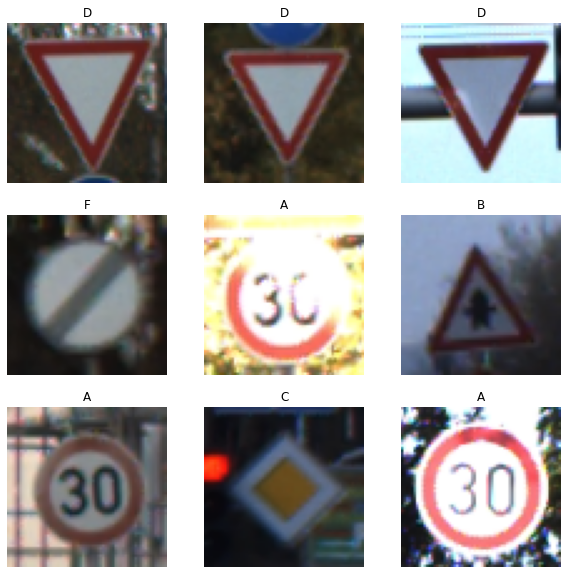

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


# Model creation
You can create your CNN model here.

In [10]:
from tensorflow.keras import layers 
from tensorflow import keras
num_classes = 7
input_shape = (64,64, 3)

model = tf.keras.Sequential([
  # TODO add your layers
  keras.Input(shape=input_shape),
  layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.5),
  layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation="softmax")
])

# Mostramos un resumen de la red creada
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        1

In [11]:
# TODO Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(train_ds.class_names)
print(val_ds.class_names)

train_ds.class_names = keras.utils.to_categorical(train_ds.class_names, 7)
val_ds.class_names = keras.utils.to_categorical(val_ds.class_names, 7)

print(train_ds.class_names)
print(val_ds.class_names)


['00', '01', '02', '03', '04', '05', '06']
['00', '01', '02', '03', '04', '05', '06']
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


# Model training
Train your model using the variables 'train_ds' and 'val_ds'.


In [12]:
# TODO Train the model

epochs = 10

#model.fit(train_ds, validation_data=val_ds)

model.fit(train_ds,batch_size=batch_size, epochs=epochs, validation_data=val_ds)

#model.fit(train_ds)

Epoch 1/10
88/88 [==============================] - 13s 138ms/step - loss: 6.4984 - accuracy: 0.3832 - val_loss: 1.1242 - val_accuracy: 0.6915
Epoch 2/10
88/88 [==============================] - 12s 133ms/step - loss: 0.8620 - accuracy: 0.7301 - val_loss: 0.3475 - val_accuracy: 0.9498
Epoch 3/10
88/88 [==============================] - 12s 135ms/step - loss: 0.2979 - accuracy: 0.9133 - val_loss: 0.1149 - val_accuracy: 0.9842
Epoch 4/10
88/88 [==============================] - 13s 143ms/step - loss: 0.1898 - accuracy: 0.9437 - val_loss: 0.0828 - val_accuracy: 0.9928
Epoch 5/10
88/88 [==============================] - 12s 140ms/step - loss: 0.1515 - accuracy: 0.9595 - val_loss: 0.0468 - val_accuracy: 0.9943
Epoch 6/10
88/88 [==============================] - 12s 136ms/step - loss: 0.1137 - accuracy: 0.9685 - val_loss: 0.0480 - val_accuracy: 0.9957
Epoch 7/10
88/88 [==============================] - 12s 133ms/step - loss: 0.0909 - accuracy: 0.9742 - val_loss: 0.0708 - val_accuracy: 0.9928

In [13]:
# Save model on your Drive, so we can use it later
model_path = '/content/gdrive/MyDrive/Colab Notebooks/traffic_classif_nore.h5'
model.save(model_path)

# Model accuracy on test data

In [14]:
# Convert test images to png
from google.colab.patches import cv2_imshow
import subprocess
import os
%cd /content/local/fsiv_gtscb/test/

!mogrify -format png *.ppm

!mkdir 00
!mkdir 01
!mkdir 02
!mkdir 03
!mkdir 04
!mkdir 05
!mkdir 06

#Getting the labels of each image
tabla=[]
with open("/content/local/fsiv_gtscb/test/CLASSES.TXT","r") as archivo:
    for linea in archivo:
        linea=linea.split(' ')
        linea.pop(0)
        tabla.append(linea)

resultado =subprocess.check_output("ls", shell=False)
res=str(resultado)[2:-1]
resu=res.split('\\n')

#Moving the files to their directory
for x in resu:
  if x[-4:]==".png":
    for i in range(0,7):
      if x[:-4].lstrip('0') in tabla[i]:
        carpeta="0"+str(i)
        cmd = 'mv /content/local/fsiv_gtscb/test/'+x+' '+carpeta
        os.system(cmd)

/content/local/fsiv_gtscb/test


# Evaluation of the trained model on test images

In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from numpy import expand_dims
import os.path as osp
import numpy as np

from keras.preprocessing.image import load_img
# TODO Compute the final evaluation metrics on the test partition
test_dir= '/content/local/fsiv_gtscb/test'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#rendimiento=model.predict(test_ds)
rendimiento = model.evaluate(test_ds, verbose=0)
print("Loss de test:", rendimiento[0])
print("Precisión de test:", rendimiento[1])

Found 63 files belonging to 7 classes.
Loss de test: 0.09075862914323807
Precisión de test: 0.9682539701461792
